In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from shapely.geometry import shape
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [2]:
# read csv
data = pd.read_csv('data/merged_data.csv')

# Load the GeoJSON file
geojson = gpd.read_file('data/CensusTracts2020.geojson')
geojson = geojson.rename(columns={'GEOID20':'CensusTract'})

/home/codespace/.python/current/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_4352/238942713.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  epa_geo['Risk Quartile'].fillna('N

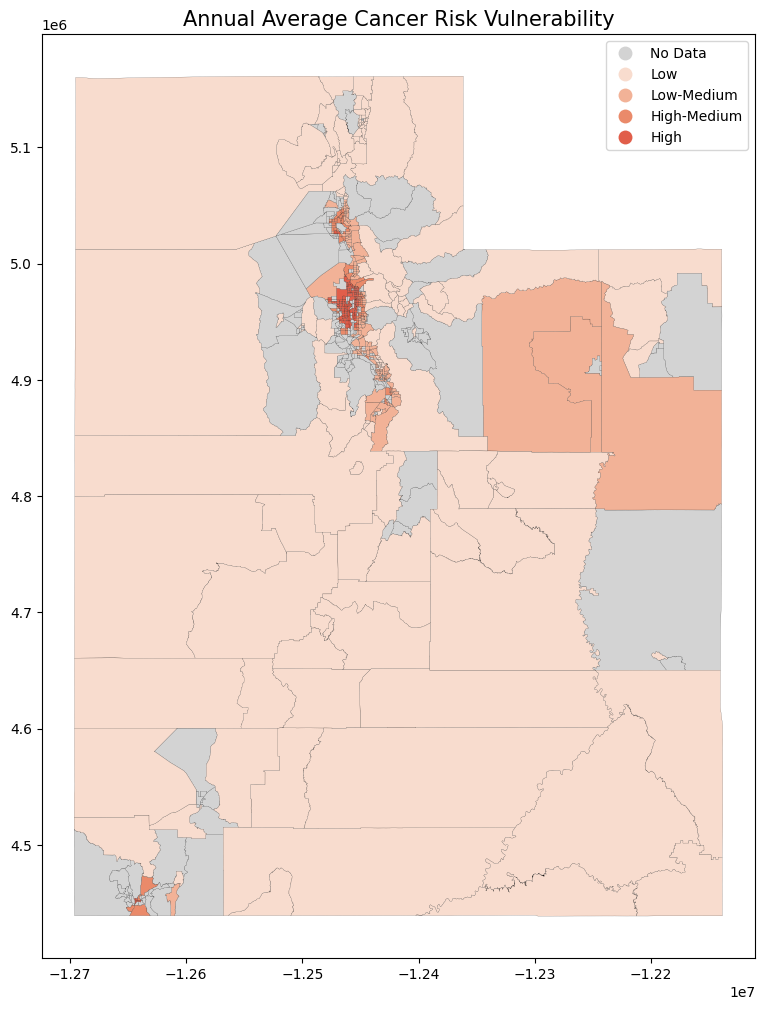

In [3]:
# EPA Map

# https://opendata.gis.utah.gov/datasets/utah-census-tracts-2020/about
# 2019 map

epa_data = data[['CensusTract','Year','County','Total Cancer Risk (per million)']]

# remove rows with NaN values
epa_data = epa_data.dropna()
#display(epa_data)

# get average cancer risk for all years
epa_avg = epa_data.groupby(['CensusTract', 'County'])['Total Cancer Risk (per million)'].mean().reset_index()
epa_avg.rename(columns={'Total Cancer Risk (per million)': 'Average Annual Cancer Risk (per million)'}, inplace=True)

# Ensure the GEOID column is the same type in both dataframes, typically a string
geojson['CensusTract'] = geojson['CensusTract'].astype(str)
epa_avg['CensusTract'] = epa_avg['CensusTract'].astype(str)

# Merge the data on the GEOID column
epa_geo = geojson.merge(epa_avg, on='CensusTract', how='left')

# Remove NaN values
epa_geo = epa_geo.fillna(0)

# Convert Total Cancer Risk to int
epa_geo['Average Annual Cancer Risk (per million)'] = epa_geo['Average Annual Cancer Risk (per million)'].astype(int)

# Filter out zero values and create quartiles from the non-zero values
non_zero_data = epa_geo[epa_geo['Average Annual Cancer Risk (per million)'] > 0]
non_zero_data['Risk Quartile'] = pd.qcut(non_zero_data['Average Annual Cancer Risk (per million)'], 4, labels=['Low', 'Low-Medium', 'High-Medium', 'High'])

# Prepare the categorical column with a new category 'Zero'
categories = ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']
epa_geo['Risk Quartile'] = pd.Categorical(epa_geo['CensusTract'].map(non_zero_data.set_index('CensusTract')['Risk Quartile']), categories=categories, ordered=True)

# Set zero values' quartile to 'No Data'
epa_geo['Risk Quartile'].fillna('No Data', inplace=True)

# Create a custom colormap
colors = ['Lightgray', '#f8dcce', '#f2b297', '#ea8a6a', '#e15e4a']  # Colors from light red to dark red, gray for zero
cmap = ListedColormap(colors)
norm = mcolors.BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
epa_geo.plot(column='Risk Quartile', cmap=cmap, norm=norm, linewidth=0.1, ax=ax, edgecolor='0', legend=True, legend_kwds={'labels': ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']})

ax.set_title('Annual Average Cancer Risk Vulnerability', fontsize=15)
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_4352/573632486.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pov_geo['Risk Quartile'].fillna('N

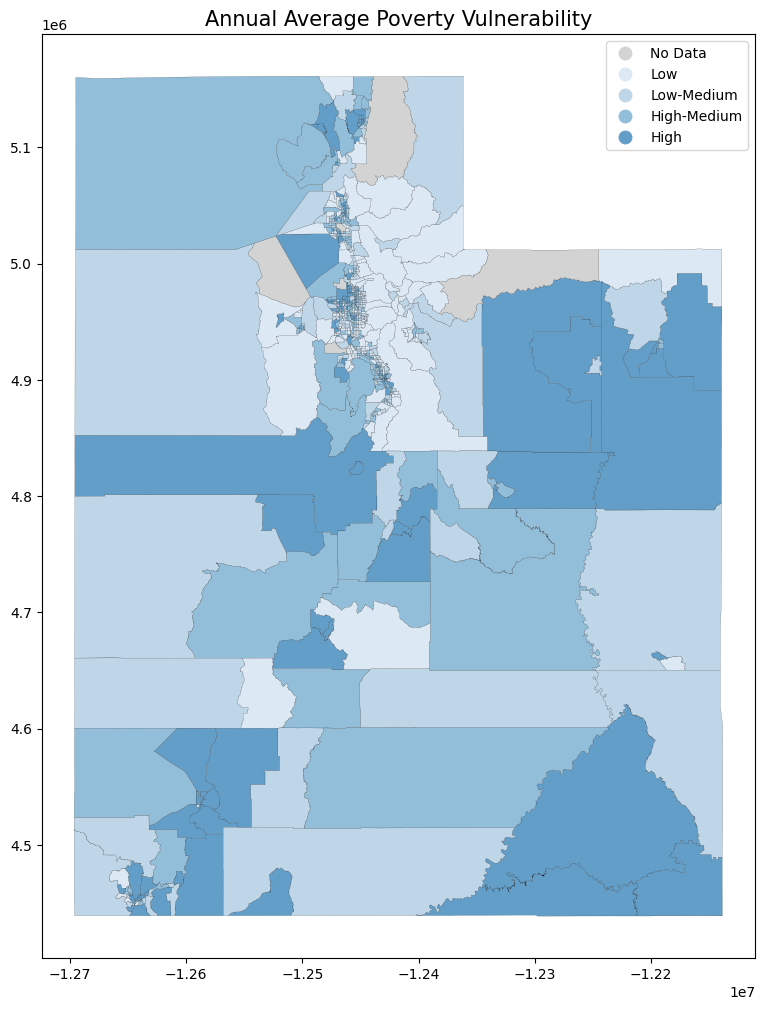

In [4]:
# Poverty Map

pov_data = data[['CensusTract','Year','County','E_POV150']]

# remove rows with NaN values
pov_data = pov_data.dropna()
#display(epa_data)

# get average cancer risk for all years
pov_avg = pov_data.groupby(['CensusTract', 'County'])['E_POV150'].mean().reset_index()
pov_avg.rename(columns={'E_POV150': 'Average E_POV150'}, inplace=True)

# Ensure the GEOID column is the same type in both dataframes, typically a string
geojson['CensusTract'] = geojson['CensusTract'].astype(str)
pov_avg['CensusTract'] = pov_avg['CensusTract'].astype(str)

# Merge the data on the GEOID column
pov_geo = geojson.merge(pov_avg, on='CensusTract', how='left')

# Remove NaN values
pov_geo = pov_geo.fillna(0)

# Convert Total Cancer Risk to int
pov_geo['Average E_POV150'] = pov_geo['Average E_POV150'].astype(int)

# Filter out zero values and create quartiles from the non-zero values
non_zero_data = pov_geo[pov_geo['Average E_POV150'] > 0]
non_zero_data['Risk Quartile'] = pd.qcut(non_zero_data['Average E_POV150'], 4, labels=['Low', 'Low-Medium', 'High-Medium', 'High'])

# Prepare the categorical column with a new category 'Zero'
categories = ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']
pov_geo['Risk Quartile'] = pd.Categorical(pov_geo['CensusTract'].map(non_zero_data.set_index('CensusTract')['Risk Quartile']), categories=categories, ordered=True)

# Set zero values' quartile to 'No Data'
pov_geo['Risk Quartile'].fillna('No Data', inplace=True)

# Create a custom colormap
colors = ['Lightgray', '#dce8f4', '#bfd6e8', '#92bed9', '#639ec8']  # Colors from light red to dark red, gray for zero
cmap = ListedColormap(colors)
norm = mcolors.BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
pov_geo.plot(column='Risk Quartile', cmap=cmap, norm=norm, linewidth=0.1, ax=ax, edgecolor='0', legend=True, legend_kwds={'labels': ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']})

ax.set_title('Annual Average Poverty Vulnerability', fontsize=15)
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_4352/3641069112.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  HBur_geo['Risk Quartile'].fillna(

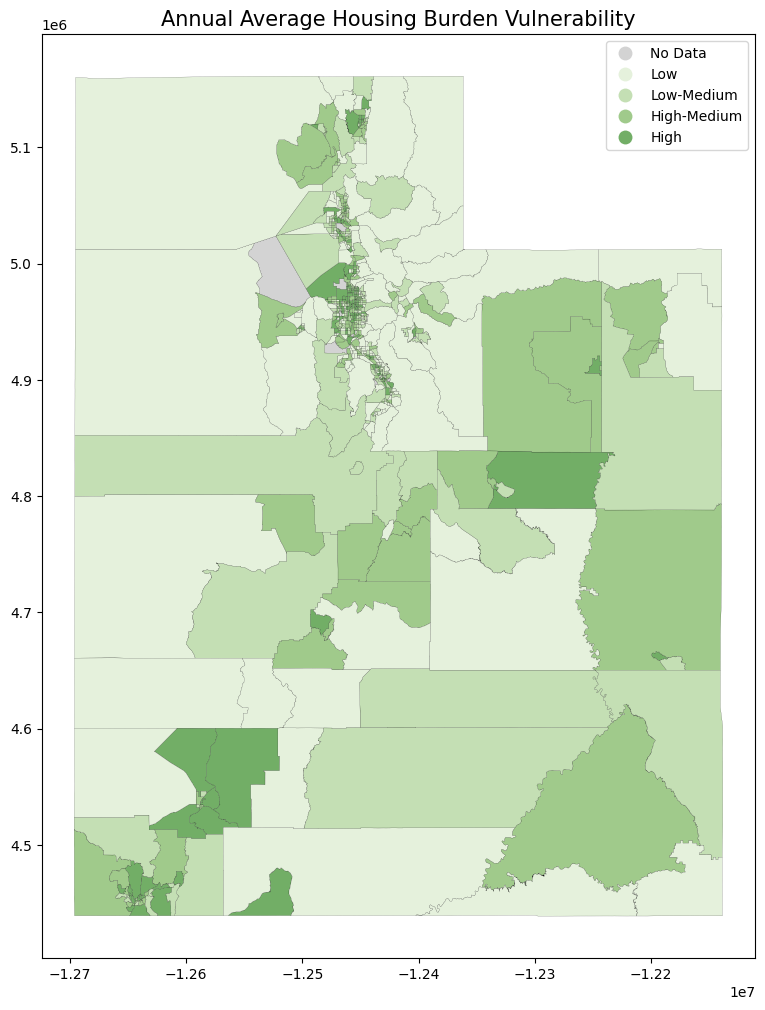

In [5]:
# Housing Burden Map

HBur_data = data[['CensusTract','Year','County','E_HBURD']]

# remove rows with NaN values
HBur_data = HBur_data.dropna()
#display(epa_data)

# get average housing burden for all years
HBur_avg = HBur_data.groupby(['CensusTract', 'County'])['E_HBURD'].mean().reset_index()
HBur_avg.rename(columns={'E_HBURD': 'Average E_HBURD'}, inplace=True)

# Ensure the GEOID column is the same type in both dataframes, typically a string
geojson['CensusTract'] = geojson['CensusTract'].astype(str)
HBur_avg['CensusTract'] = HBur_avg['CensusTract'].astype(str)

# Merge the data on the GEOID column
HBur_geo = geojson.merge(HBur_avg, on='CensusTract', how='left')

# Remove NaN values
HBur_geo = HBur_geo.fillna(0)

# Convert to int
HBur_geo['Average E_HBURD'] = HBur_geo['Average E_HBURD'].astype(int)

# Filter out zero values and create quartiles from the non-zero values
non_zero_data = HBur_geo[HBur_geo['Average E_HBURD'] > 0]
non_zero_data['Risk Quartile'] = pd.qcut(non_zero_data['Average E_HBURD'], 4, labels=['Low', 'Low-Medium', 'High-Medium', 'High'])

# Prepare the categorical column with a new category 'Zero'
categories = ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']
HBur_geo['Risk Quartile'] = pd.Categorical(HBur_geo['CensusTract'].map(non_zero_data.set_index('CensusTract')['Risk Quartile']), categories=categories, ordered=True)

# Set zero values' quartile to 'No Data'
HBur_geo['Risk Quartile'].fillna('No Data', inplace=True)

# Create a custom colormap
colors = ['Lightgray', '#e5f1dc', '#c4dfb4', '#a0ca8b', '#72ae66']
cmap = ListedColormap(colors)
norm = mcolors.BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
HBur_geo.plot(column='Risk Quartile', cmap=cmap, norm=norm, linewidth=0.1, ax=ax, edgecolor='0', legend=True, legend_kwds={'labels': ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']})

ax.set_title('Annual Average Housing Burden Vulnerability', fontsize=15)
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_4352/1787144115.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  FA_geo['Risk Quartile'].fillna('N

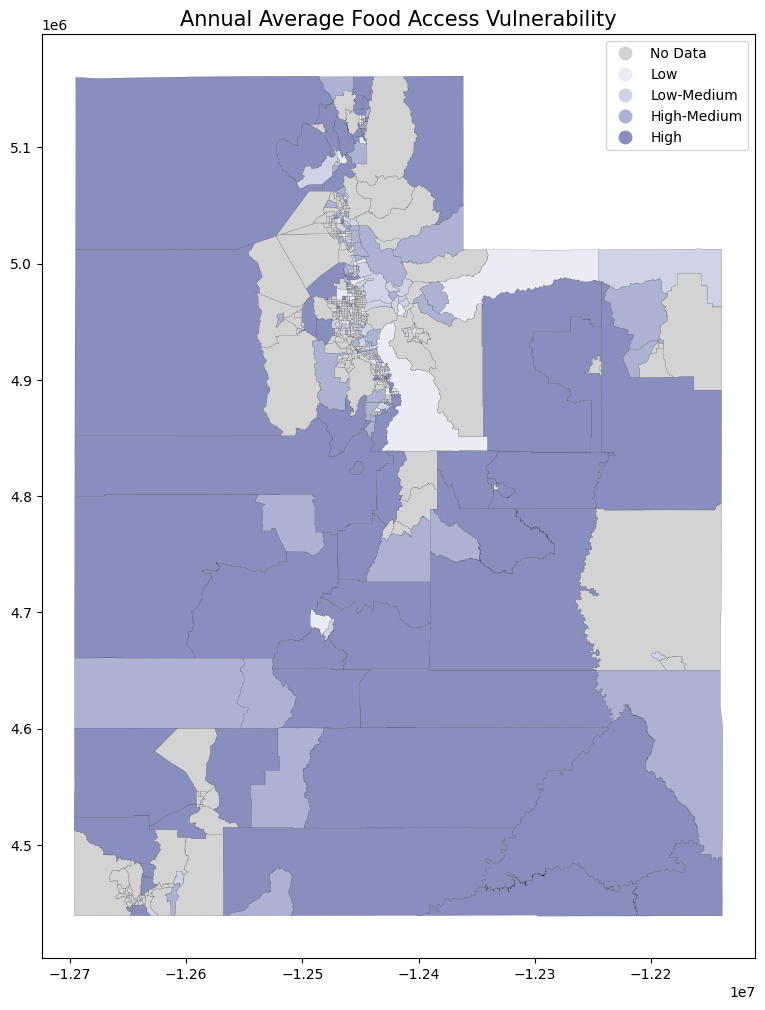

In [6]:
# Food Access Map

FA_data = data[['CensusTract','Year','County','lalowi1']]

# remove rows with NaN values
FA_data = FA_data.dropna()

# get average housing burden for all years
FA_avg = FA_data.groupby(['CensusTract', 'County'])['lalowi1'].mean().reset_index()
FA_avg.rename(columns={'lalowi1': 'Average lalowi1'}, inplace=True)

# Ensure the GEOID column is the same type in both dataframes, typically a string
geojson['CensusTract'] = geojson['CensusTract'].astype(str)
FA_avg['CensusTract'] = FA_avg['CensusTract'].astype(str)

# Merge the data on the GEOID column
FA_geo = geojson.merge(FA_avg, on='CensusTract', how='left')

# Remove NaN values
FA_geo = FA_geo.fillna(0)

# Convert to int
FA_geo['Average lalowi1'] = FA_geo['Average lalowi1'].astype(int)

# Filter out zero values and create quartiles from the non-zero values
non_zero_data = FA_geo[FA_geo['Average lalowi1'] > 0]
non_zero_data['Risk Quartile'] = pd.qcut(non_zero_data['Average lalowi1'], 4, labels=['Low', 'Low-Medium', 'High-Medium', 'High'])

# Prepare the categorical column with a new category 'Zero'
categories = ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']
FA_geo['Risk Quartile'] = pd.Categorical(FA_geo['CensusTract'].map(non_zero_data.set_index('CensusTract')['Risk Quartile']), categories=categories, ordered=True)

# Set zero values' quartile to 'No Data'
FA_geo['Risk Quartile'].fillna('No Data', inplace=True)

# Create a custom colormap
colors = ['Lightgray', '#ebebf3', '#d0d3e6', '#adb2d2', '#8a8ebe']
cmap = ListedColormap(colors)
norm = mcolors.BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
FA_geo.plot(column='Risk Quartile', cmap=cmap, norm=norm, linewidth=0.1, ax=ax, edgecolor='0', legend=True, legend_kwds={'labels': ['No Data', 'Low', 'Low-Medium', 'High-Medium', 'High']})

ax.set_title('Annual Average Food Access Vulnerability', fontsize=15)
plt.show()

In [17]:
# Cancer Risk Mode
epa_mode = epa_geo.groupby('County')['Risk Quartile'].apply(lambda x: x.mode().iloc[0])
epa_mode = epa_mode.reset_index()
epa_mode.columns = ['County', 'Cancer Risk Vulnerability']

# Poverty Mode
pov_mode = pov_geo.groupby('County')['Risk Quartile'].apply(lambda x: x.mode().iloc[0])
pov_mode = pov_mode.reset_index()
pov_mode.columns = ['County', 'Cancer Risk Vulnerability']

# Housing Burden Mode
HBur_mode = HBur_geo.groupby('County')['Risk Quartile'].apply(lambda x: x.mode().iloc[0])
HBur_mode = HBur_mode.reset_index()
HBur_mode.columns = ['County', 'Cancer Risk Vulnerability']

#Food Access Mode
FA_mode = FA_geo.groupby('County')['Risk Quartile'].apply(lambda x: x.mode().iloc[0])
FA_mode = FA_mode.reset_index()
FA_mode.columns = ['County', 'Food Access Vulnerability']

# Merge the dataframes
merged = epa_mode.merge(pov_mode, on='County', how='left')
merged = merged.merge(HBur_mode, on='County', how='left')
merged = merged.merge(FA_mode, on='County', how='left')

# Rename columns
merged = merged.rename(columns={
    'Cancer Risk Vulnerability_x': 'Cancer Risk Vulnerability',
    'Cancer Risk Vulnerability_y': 'Poverty Vulnerability',
    'Cancer Risk Vulnerability': 'Housing Burden Vulnerability',
    'Food Access Vulnerability': 'Food Access Vulnerability'
})
merged = merged.iloc[1:]


# Display the merged dataframe
display(merged)

,County,Cancer Risk Vulnerability,Poverty Vulnerability,Housing Burden Vulnerability,Food Access Vulnerability
1,Beaver,Low,Low,Low,High-Medium
2,Box Elder,Low,High-Medium,High-Medium,High
3,Cache,Low,High,High,High
4,Carbon,Low,High-Medium,High-Medium,High
5,Daggett,Low,Low,Low,Low-Medium
6,Davis,Low-Medium,Low,Low,High-Medium
7,Duchesne,Low-Medium,High,High-Medium,High
8,Emery,Low,High-Medium,Low,High
9,Garfield,Low,Low-Medium,Low,High-Medium
10,Grand,Low,Low,Low-Medium,Low-Medium


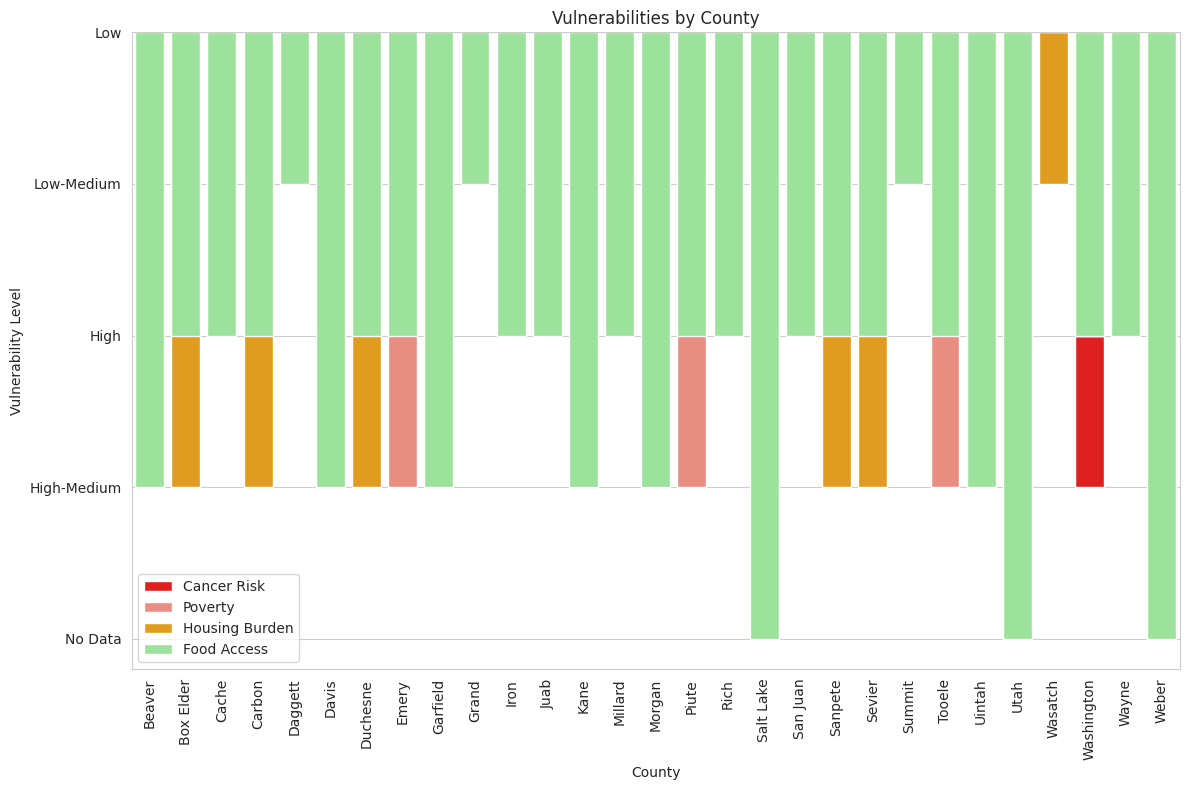

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=merged, x='County', y='Cancer Risk Vulnerability', color='red', label='Cancer Risk')
sns.barplot(data=merged, x='County', y='Poverty Vulnerability', color='salmon', label='Poverty')
sns.barplot(data=merged, x='County', y='Housing Burden Vulnerability', color='orange', label='Housing Burden')
sns.barplot(data=merged, x='County', y='Food Access Vulnerability', color='lightgreen', label='Food Access')
plt.xticks(rotation=90)
plt.title('Vulnerabilities by County')
plt.xlabel('County')
plt.ylabel('Vulnerability Level')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#E_POV150 - Persons below 150% poverty estimate
#E_HBURD - Housing cost-burdened occupied housing units with annual income less than $75,000 (30%+ of income spent on housing costs)
#Lalowi1 - Low income population count beyond 1 mile from supermarket